# Part A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [2]:
#Read the data
s = pd.read_csv('50_Startups.csv')
s

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#To find whether there are any existing null values or not
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Count of duplicated rows
s[s.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


<AxesSubplot:>

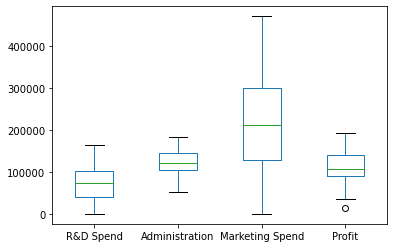

In [5]:
#Outlier Detection
s.plot(kind='box')

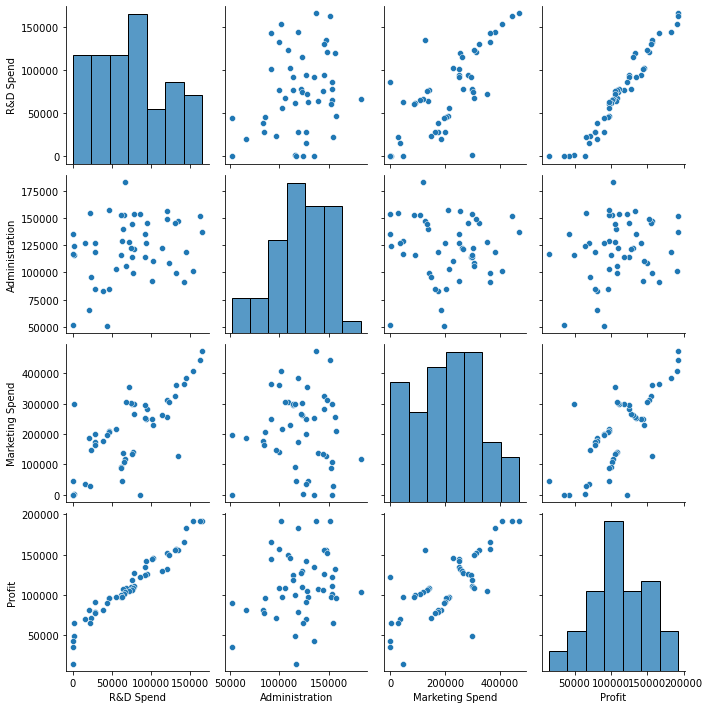

In [6]:
#To find out linearity between the variables
sns.pairplot(s)

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

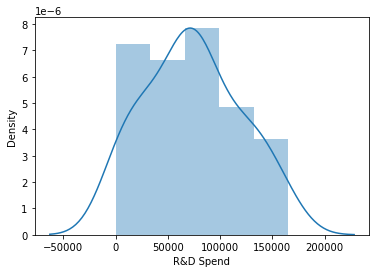

In [7]:
#To check whether the distribution is normal
sns.distplot(s['R&D Spend'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

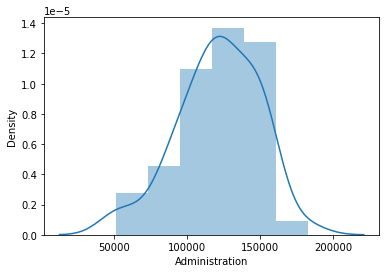

In [8]:
sns.distplot(s['Administration'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

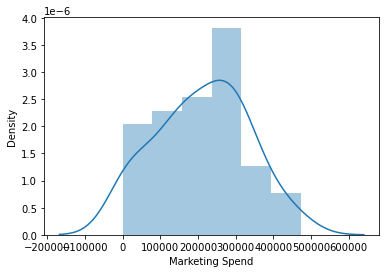

In [9]:
sns.distplot(s['Marketing Spend'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

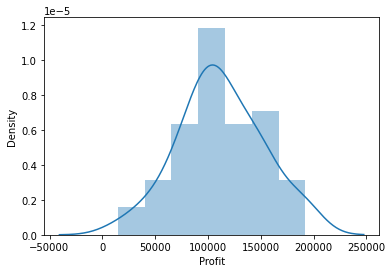

In [10]:
sns.distplot(s['Profit'])

In [11]:
#Rename
s = s.rename({'R&D Spend': 'R_and_D_Spend'}, axis=1)
s = s.rename({'Marketing Spend': 'Marketing_Spend'}, axis=1)
s

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


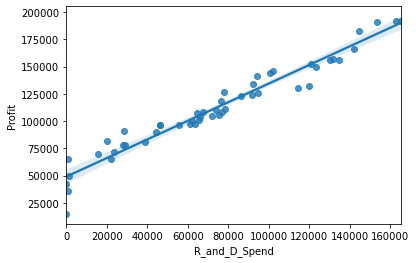

In [12]:
#Regression plot
sns.regplot(x="R_and_D_Spend", y="Profit", data=s);

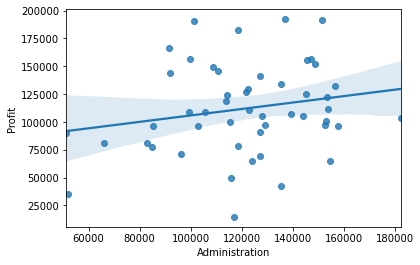

In [13]:
#Regression plot
sns.regplot(x="Administration", y="Profit", data=s);

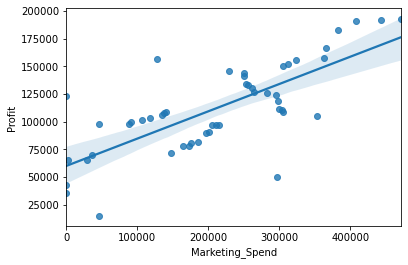

In [14]:
#Regression plot
sns.regplot(x="Marketing_Spend", y="Profit", data=s);

In [15]:
pd.get_dummies(s)

,R_and_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [16]:
!pip install pandas_profiling
!pip install sweetviz

In [17]:
EDA_report= pp.ProfileReport(s)
EDA_report.to_file(output_file='sreport.html')

In [18]:
sweet_report = sv.analyze(s)
sweet_report.show_html('s_report.html')


Report s_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
s.isna().sum()

R_and_D_Spend      0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

# Scatterplot between variables along with histograms

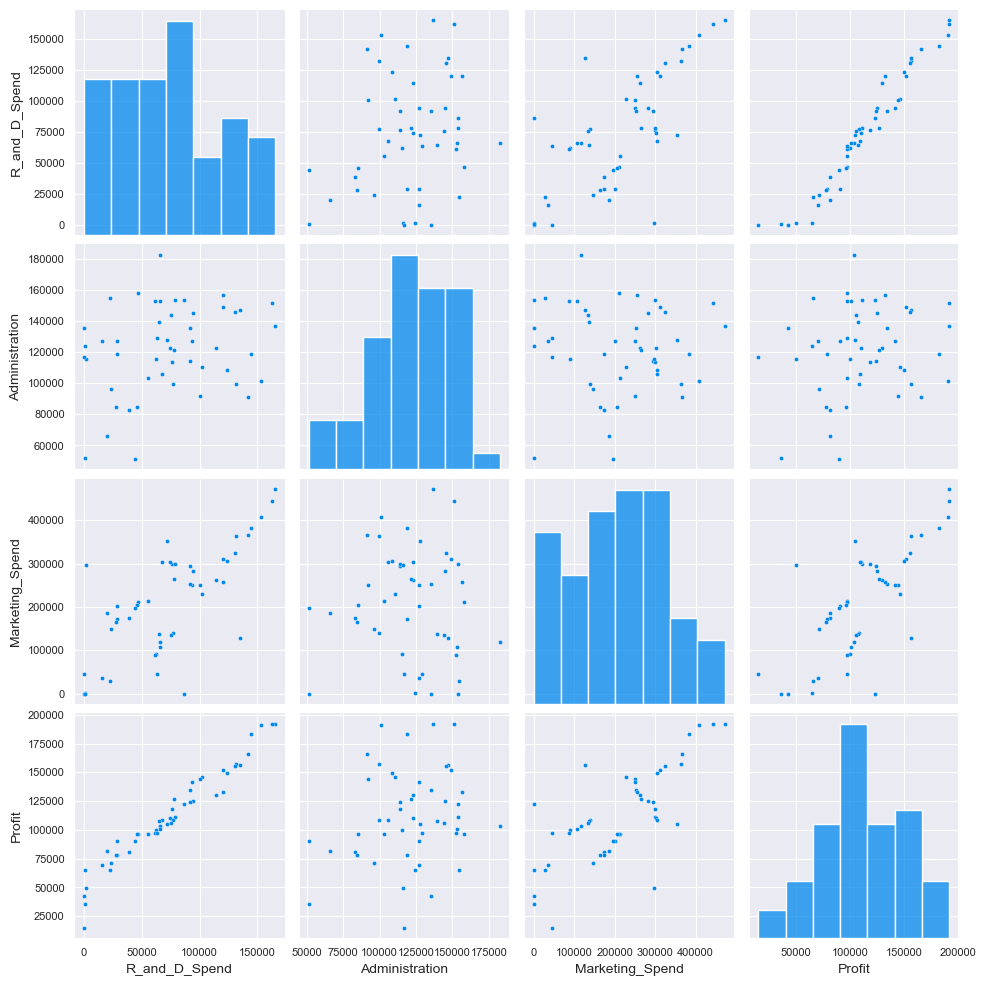

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(s)

# Correlation Matrix

In [21]:
s.corr()

,R_and_D_Spend,Administration,Marketing_Spend,Profit
R_and_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Preparing a model

In [22]:
#Model building between the al input variables
import statsmodels.formula.api as smf
model=smf.ols('Profit~ R_and_D_Spend+Administration+Marketing_Spend',data=s).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.53e-30
Time:                        01:46:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D_Spend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [23]:
model1=smf.ols('Profit~Administration',data=s).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 07 May 2021   Prob (F-statistic):              0.162
Time:                        01:46:02   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model2=smf.ols('Profit~Marketing_Spend',data=s).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.38e-10
Time:                        01:46:02   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [25]:
rsq_R_and_D_Spend = smf.ols('R_and_D_Spend~Administration+Marketing_Spend',data=s).fit().rsquared  
vif_R_and_D_Spend = 1/(1-rsq_R_and_D_Spend)

rsq_Administration = smf.ols('Administration~R_and_D_Spend+Marketing_Spend',data=s).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing_Spend = smf.ols('Marketing_Spend~R_and_D_Spend+Administration',data=s).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)

# Storing vif values in a data frame
d1 = {'Variables':['R_and_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_R_and_D_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_and_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis

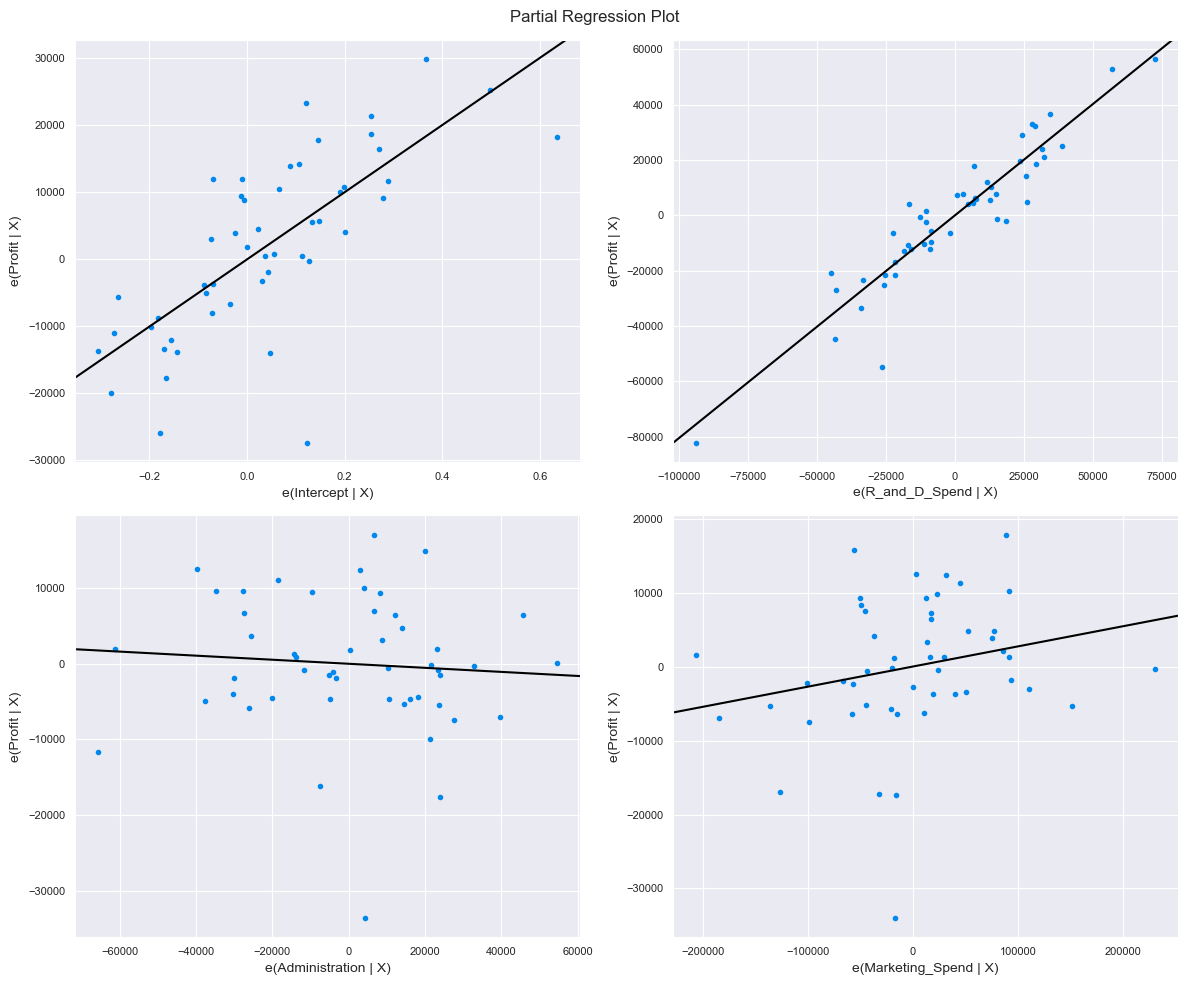

In [26]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

In [27]:
model3=smf.ols('Profit~ R_and_D_Spend+Marketing_Spend',data=s).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.16e-31
Time:                        01:46:11   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_and_D_Spend       0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

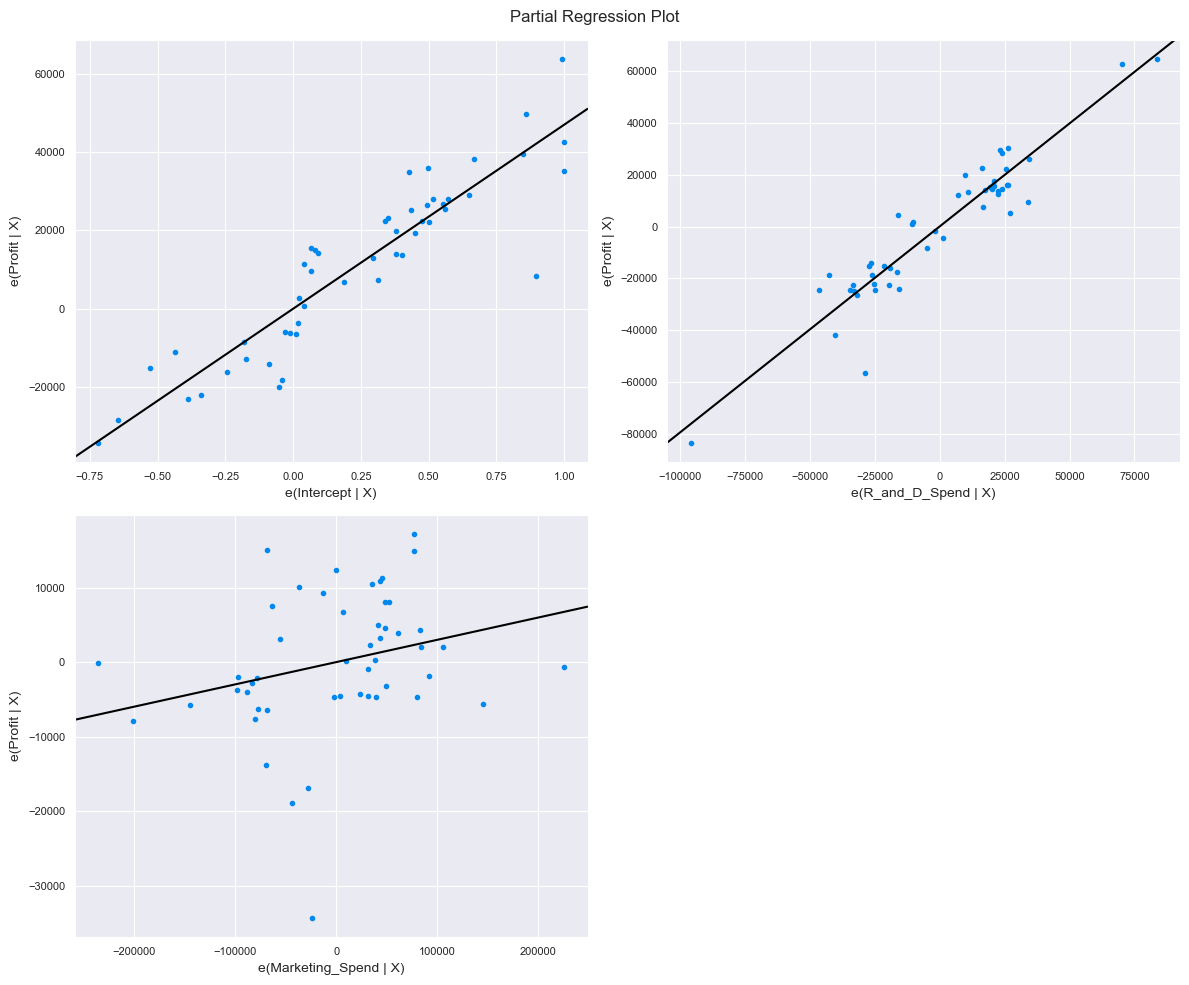

In [28]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

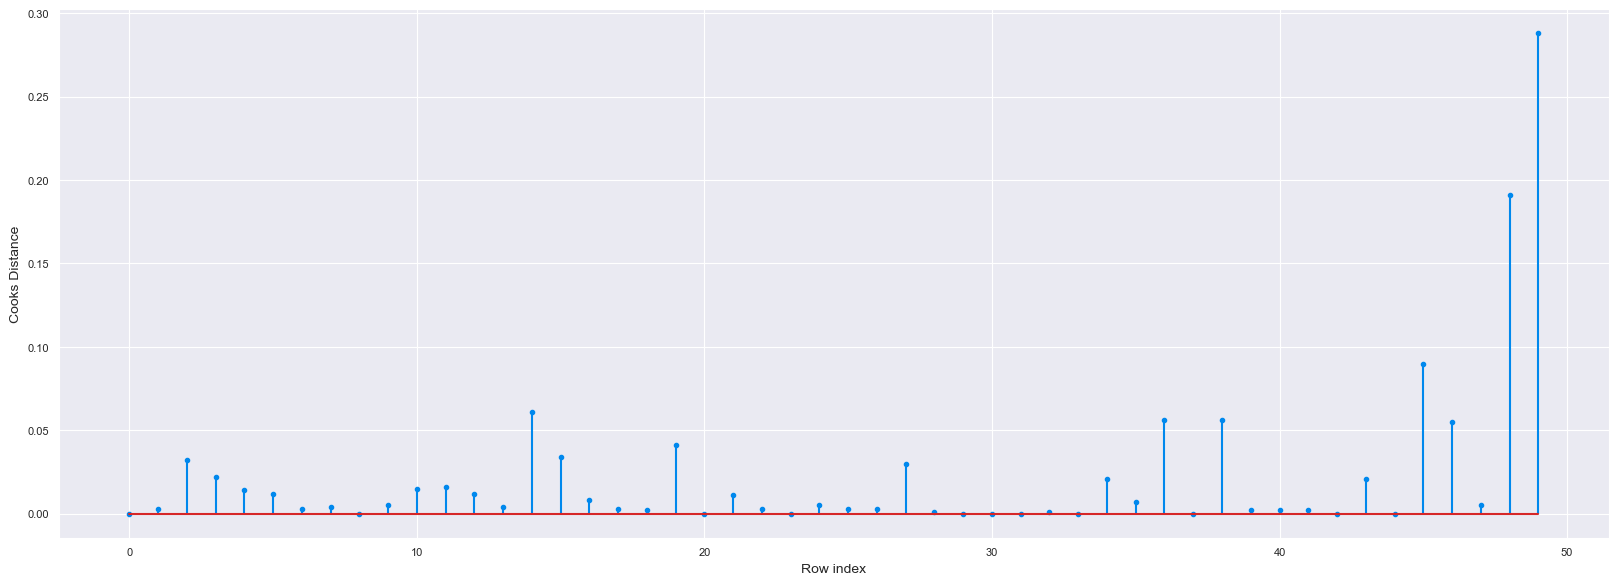

In [30]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(s)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

# High Influence points

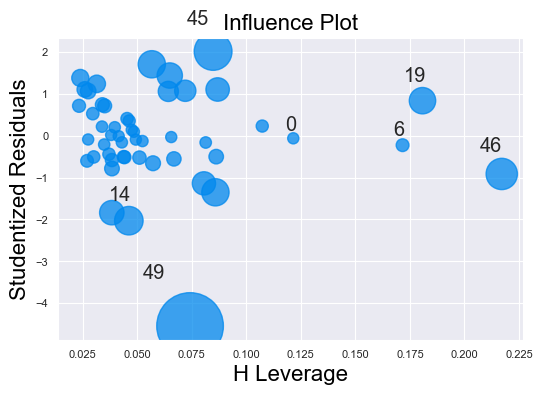

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

In [33]:
k = s.shape[1]
n = s.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

# To analyze the 49th observation before removing

In [34]:
s.iloc[42:50,:]

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [35]:
s_imp=s.drop([49],axis=0)
s_imp

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
#improved model with no influential observation
model_imp=smf.ols('Profit~ R_and_D_Spend+Marketing_Spend',data=s_imp).fit()
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.74e-33
Time:                        01:46:13   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
R_and_D_Spend       0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_Spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test for Normality of Residuals (Q-Q Plot)

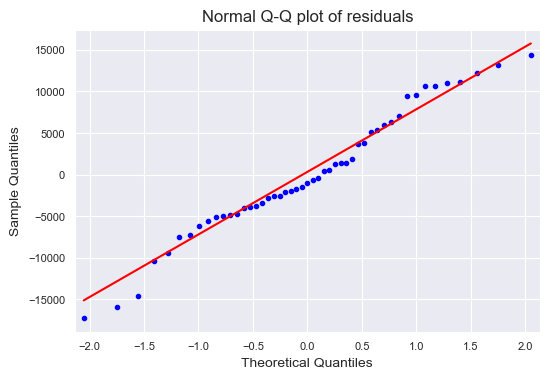

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_imp.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

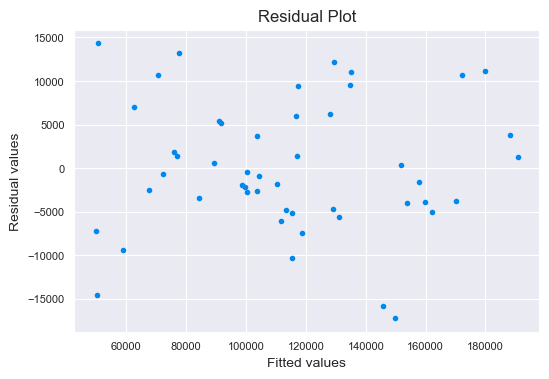

In [38]:
plt.scatter(model_imp.fittedvalues,model_imp.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

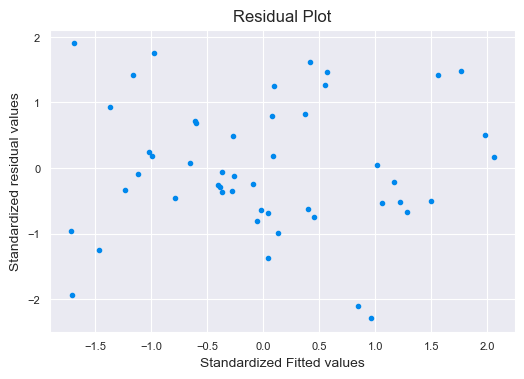

In [40]:
plt.scatter(get_standardized_values(model_imp.fittedvalues),
            get_standardized_values(model_imp.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

(array([ 3.,  0.,  2.,  8., 11.,  8.,  3.,  5.,  6.,  3.]),
 array([-17224.80077674, -14071.02133709, -10917.24189745,  -7763.4624578 ,
         -4609.68301815,  -1455.90357851,   1697.87586114,   4851.65530079,
          8005.43474043,  11159.21418008,  14312.99361973]),
 <BarContainer object of 10 artists>)

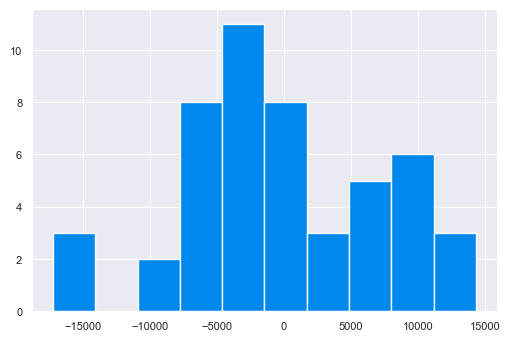

In [41]:
plt.hist(model_imp.resid)

In [42]:
model_imp.resid.mean()

-3.133116442025924e-11

In [43]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~ R_and_D_Spend+Marketing_Spend',data = s_imp).fit()

In [44]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9610856807456628, 1018.8564801588338)

# Predicting for new data

In [45]:
#New data for prediction
new_data=pd.DataFrame({'R_and_D_Spend':165349.2,"Administration":136897.8,"Marketing_Spend":471784.1},index=[1])

In [46]:
final_ml_V.predict(new_data)

1    190942.726927
dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(s_imp,test_size = 0.2)
train_data

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
39,38558.51,82982.09,174999.30,California,81005.76
41,27892.92,84710.77,164470.71,Florida,77798.83
10,101913.08,110594.11,229160.95,Florida,146121.95
14,119943.24,156547.42,256512.92,Florida,132602.65
34,46426.07,157693.92,210797.67,California,96712.80
43,15505.73,127382.30,35534.17,New York,69758.98
35,46014.02,85047.44,205517.64,New York,96479.51
20,76253.86,113867.30,298664.47,California,118474.03
47,0.00,135426.92,0.00,California,42559.73
13,91992.39,135495.07,252664.93,California,134307.35


In [48]:
#final model building using train_data
model_imp1 = smf.ols('Profit~ R_and_D_Spend+Marketing_Spend',data = train_data).fit()
model_imp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     564.0
Date:                Fri, 07 May 2021   Prob (F-statistic):           6.70e-28
Time:                        01:46:14   Log-Likelihood:                -401.91
No. Observations:                  39   AIC:                             809.8
Df Residuals:                      36   BIC:                             814.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.789e+04   2754.633     17.384      0.000    4.23e+04    5.35e+04
R_and_D_Spend       0.7841      0.039     20.029      0.000       0.705       0.863
Marketing_Spend     0.0322      0.016      1.964      0.057      -0.001       0.065
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.287
Skew:                          -0.001   Prob(JB):                        0.866
Kurtosis:                       2.580   Cond. No.                     6.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
p = model_imp.predict(test_data)
p

15    145769.611357
19    116793.710748
23    110513.437292
25    103711.697086
16    117530.489091
30    100355.932697
26    111873.132740
32    100216.309933
31     99610.626757
45     50613.086380
dtype: float64

In [50]:
#To calculate RMSE Values
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [51]:
#predict y values for train data 
train_yhat = model_imp.predict(train_data)
train_y = train_data.Profit
RMSE_train = RMSE(train_yhat, train_y)
print("RMSE value of train data is",round(RMSE_train,4))

RMSE value of train data is 7290.881


In [52]:
#predict y values for test data
test_yhat = model_imp.predict(test_data)
test_y = test_data.Profit
RMSE_test = RMSE(test_yhat,test_y)
print("RMSE value of test data is",round(RMSE_test,4))

RMSE value of test data is 8052.784


# Part B

In [53]:
#Read the data
r = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
r

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
q = r.drop(['Id', 'Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Cylinders', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
q

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [55]:
#To find whether there are any existing null values or not
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1436 non-null   object
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   KM             1436 non-null   int64 
 4   HP             1436 non-null   int64 
 5   cc             1436 non-null   int64 
 6   Doors          1436 non-null   int64 
 7   Gears          1436 non-null   int64 
 8   Quarterly_Tax  1436 non-null   int64 
 9   Weight         1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [56]:
#Count of duplicated rows
q[q.duplicated()]

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


<AxesSubplot:>

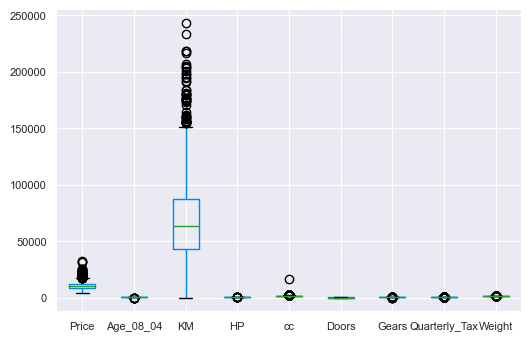

In [57]:
#Outlier Detection
q.plot(kind='box')

<AxesSubplot:>

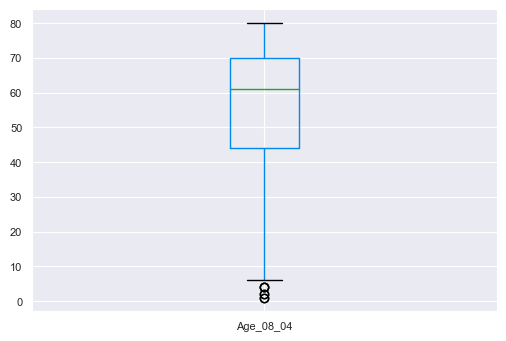

In [58]:
q.Age_08_04.plot(kind='box')

In [59]:
q.Age_08_04.describe()

count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age_08_04, dtype: float64

In [60]:
IQR = 70.000000 - 44.000000
IQR

26.0

In [61]:
#Calculation of lower fence
lower_fence = 44.00000 - (1.5*IQR)
lower_fence

5.0

In [62]:
index=q[q.Age_08_04<5].index
q = q.drop(index,axis=0)

<AxesSubplot:>

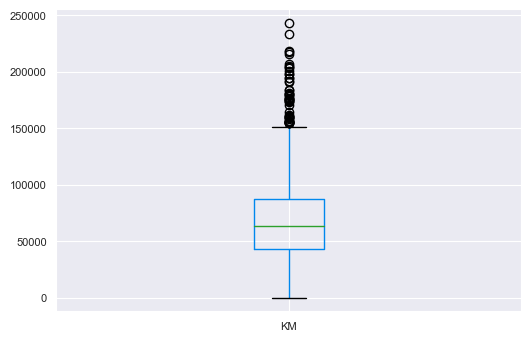

In [63]:
q.KM.plot(kind='box')

In [64]:
q.KM.describe()

count      1429.000000
mean      68864.953114
std       37296.571179
min           1.000000
25%       43120.000000
50%       63634.000000
75%       87274.000000
max      243000.000000
Name: KM, dtype: float64

In [65]:
IQR = 87274.000000 - 43120.000000
IQR

44154.0

In [66]:
#Calculation of upper fence
upper_fence = 87274.000000 + (1.5*IQR)
upper_fence

153505.0

In [67]:
index=q[q.KM>153505.0].index
q = q.drop(index,axis=0)

<AxesSubplot:>

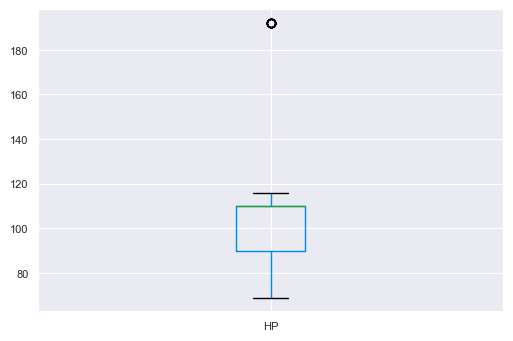

In [68]:
q.HP.plot(kind='box')

In [69]:
q.HP.describe()

count    1380.000000
mean      102.236957
std        14.452330
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

In [70]:
IQR = 110.000000 - 90.000000
IQR

20.0

In [71]:
#Calculation of upper fence
upper_fence = 110.000000 + (1.5*IQR)
upper_fence

140.0

In [72]:
index=q[q.HP>140.0].index
q = q.drop(index,axis=0)

<AxesSubplot:>

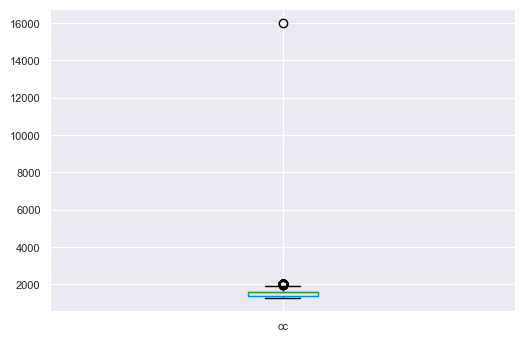

In [73]:
q.cc.plot(kind='box')

In [74]:
q.cc.describe()

count     1369.000000
mean      1565.423667
std        428.252904
min       1300.000000
25%       1400.000000
50%       1600.000000
75%       1600.000000
max      16000.000000
Name: cc, dtype: float64

In [75]:
IQR = 1600.000000 - 1400.000000
IQR

200.0

In [76]:
#Calculation of upper fence
upper_fence = 1600.000000 + (1.5*IQR)
upper_fence

1900.0

In [77]:
index=q[q.cc>1900.0].index
q = q.drop(index,axis=0)

<AxesSubplot:>

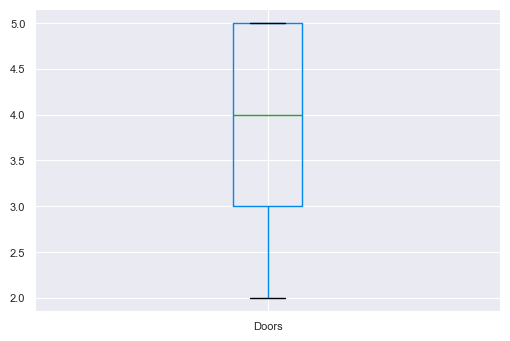

In [78]:
q.Doors.plot(kind='box')

<AxesSubplot:>

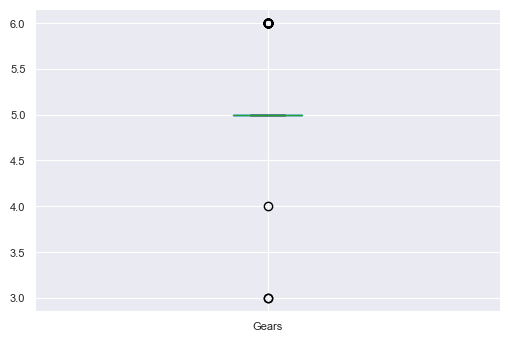

In [79]:
q.Gears.plot(kind='box')

<AxesSubplot:>

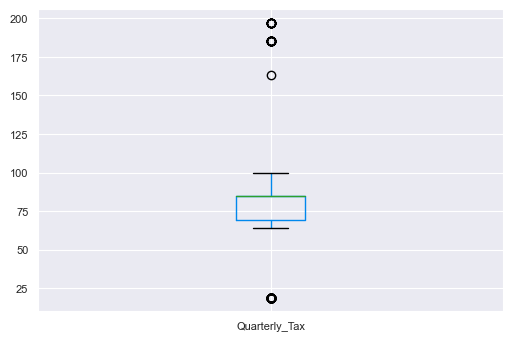

In [80]:
q.Quarterly_Tax.plot(kind='box')

In [81]:
q.Quarterly_Tax.describe()

count    1277.000000
mean       77.346124
std        23.968812
min        19.000000
25%        69.000000
50%        85.000000
75%        85.000000
max       197.000000
Name: Quarterly_Tax, dtype: float64

In [82]:
IQR = 85.000000 - 69.000000
IQR

16.0

In [83]:
#Calculation of lower fence
lower_fence = 69.000000 - (1.5*IQR)
lower_fence

45.0

In [84]:
#Calculation of upper fence
upper_fence = 85.000000 + (1.5*IQR)
upper_fence

109.0

In [85]:
index=q[q.Quarterly_Tax<45].index
q = q.drop(index,axis=0)

In [86]:
index=q[q.Quarterly_Tax>109].index
q = q.drop(index,axis=0)

<AxesSubplot:>

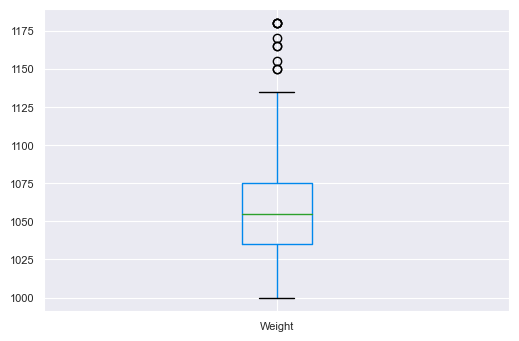

In [87]:
q.Weight.plot(kind='box')

In [88]:
q.Weight.describe()

count    1175.000000
mean     1059.445957
std        30.659702
min      1000.000000
25%      1035.000000
50%      1055.000000
75%      1075.000000
max      1180.000000
Name: Weight, dtype: float64

In [89]:
IQR = 1075.000000 - 1035.000000
IQR

40.0

In [90]:
#Calculation of upper fence
upper_fence = 1075.000000 + (1.5*IQR)
upper_fence

1135.0

In [91]:
index=q[q.Weight>1135].index
q = q.drop(index,axis=0)

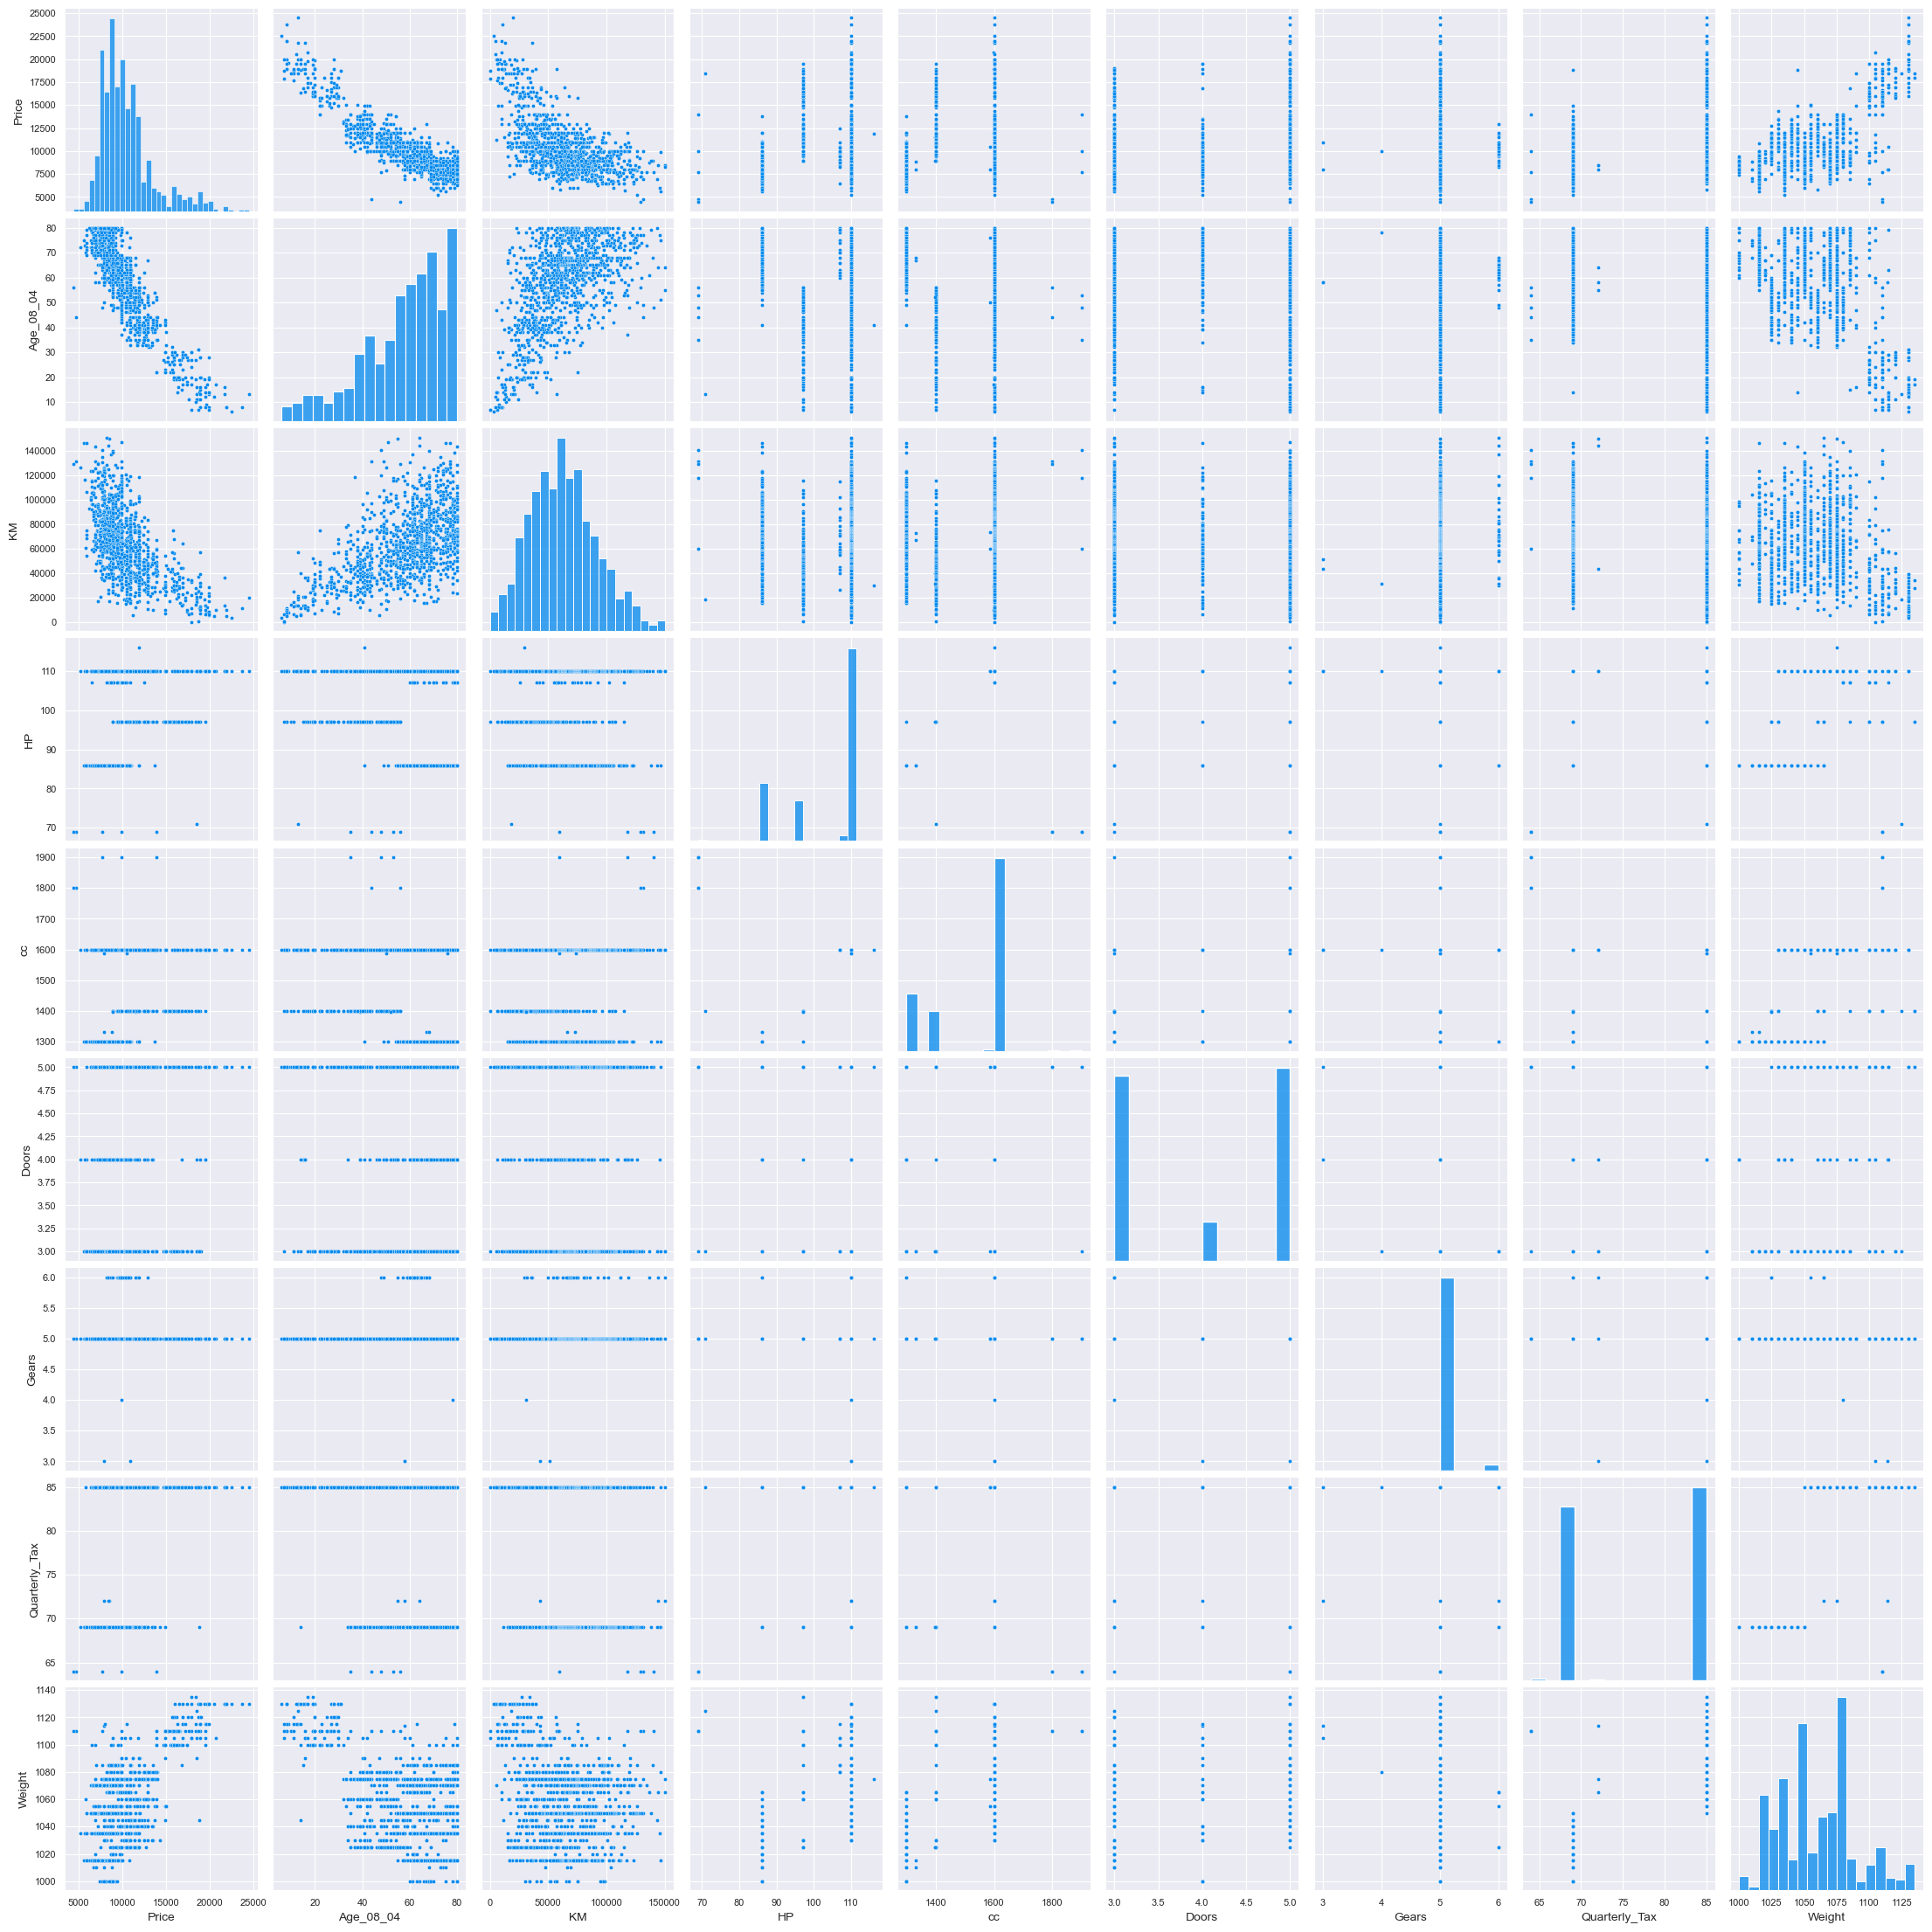

In [92]:
#To find out linearity between the variables
sns.pairplot(q)

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

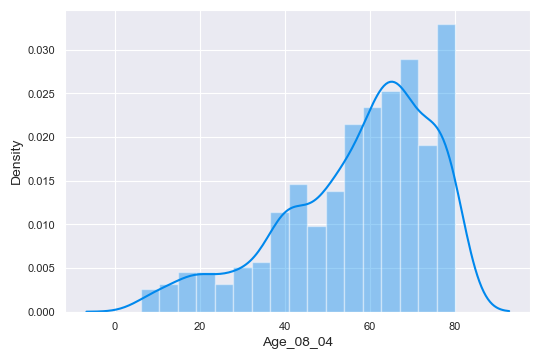

In [93]:
#To check whether the distribution is normal
sns.distplot(q['Age_08_04'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

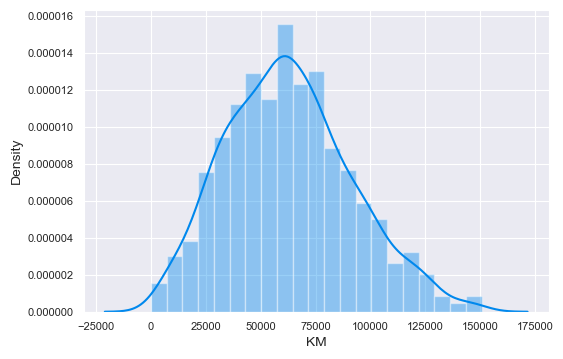

In [94]:
sns.distplot(q['KM'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

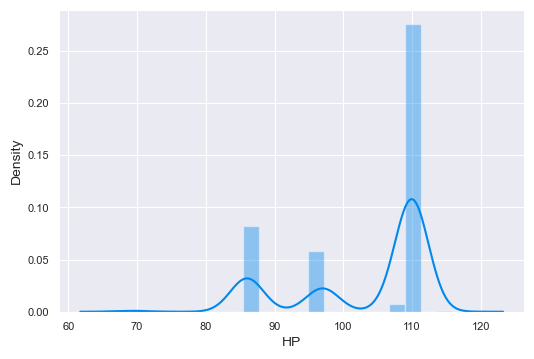

In [95]:
sns.distplot(q['HP'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

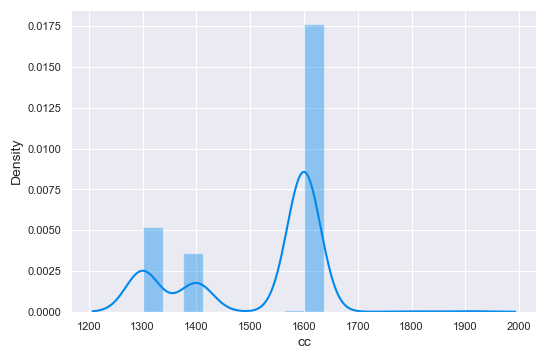

In [96]:
sns.distplot(q['cc'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

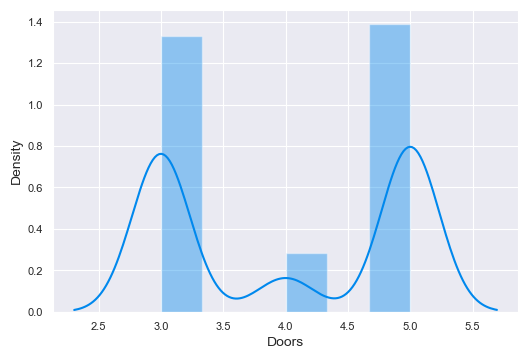

In [97]:
sns.distplot(q['Doors'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

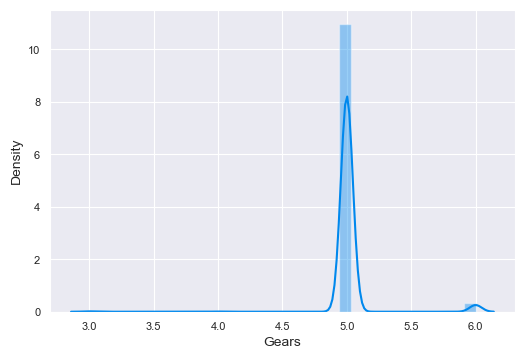

In [98]:
sns.distplot(q['Gears'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Density'>

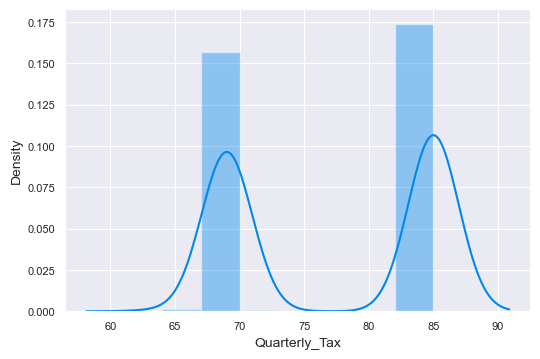

In [99]:
sns.distplot(q['Quarterly_Tax'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

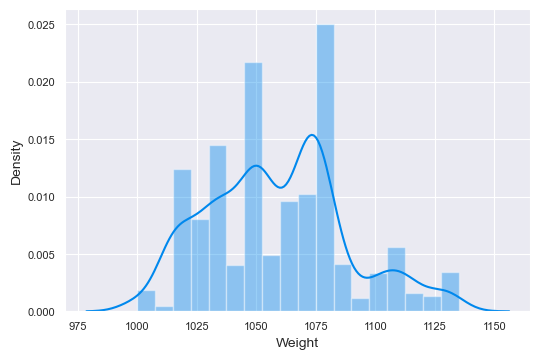

In [100]:
sns.distplot(q['Weight'])

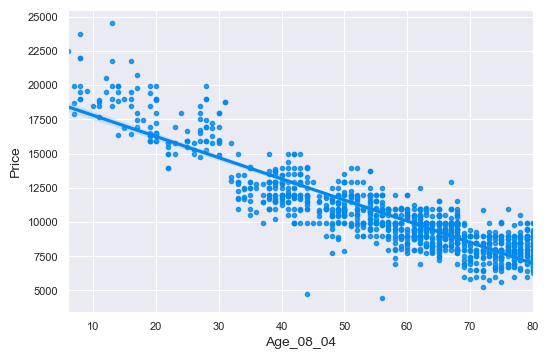

In [101]:
#Regression plot
sns.regplot(x="Age_08_04", y="Price", data=q);

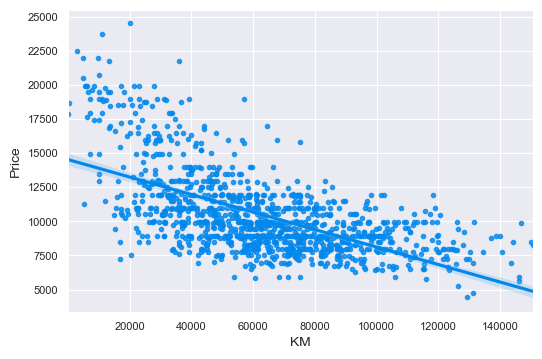

In [102]:
sns.regplot(x="KM", y="Price", data=q);

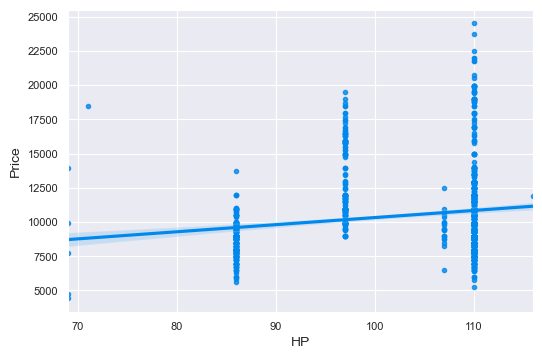

In [103]:
sns.regplot(x="HP", y="Price", data=q);

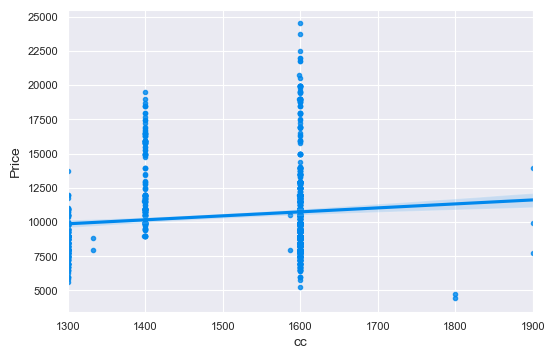

In [104]:
sns.regplot(x="cc", y="Price", data=q);

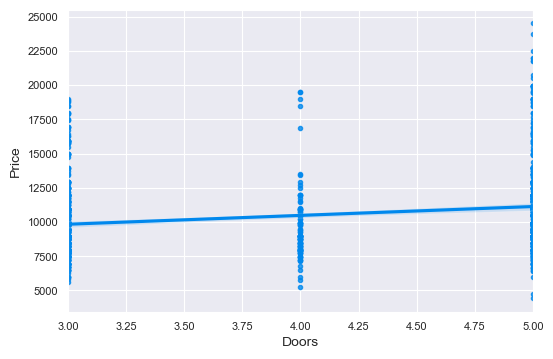

In [105]:
sns.regplot(x="Doors", y="Price", data=q);

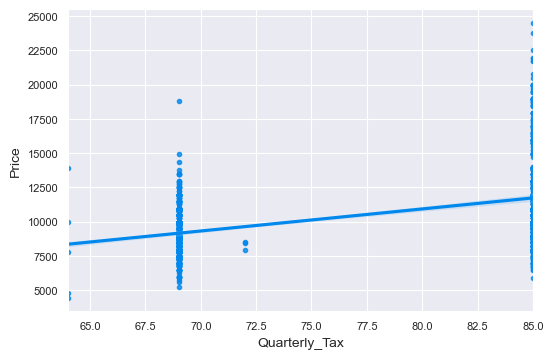

In [106]:
sns.regplot(x="Quarterly_Tax", y="Price", data=q);

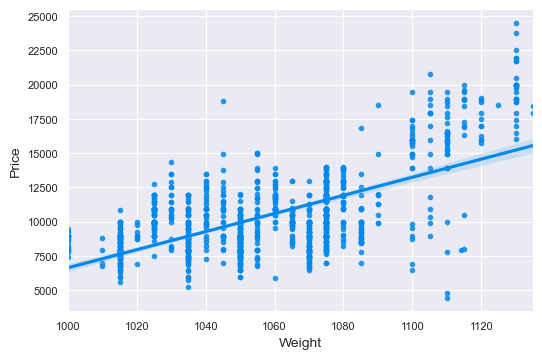

In [107]:
sns.regplot(x="Weight", y="Price", data=q);

In [108]:
EDA_report= pp.ProfileReport(q)
EDA_report.to_file(output_file='qreport.html')

In [109]:
sweet_report = sv.analyze(q)
sweet_report.show_html('q_report.html')


Report q_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [110]:
q.isna().sum()

Model            0
Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

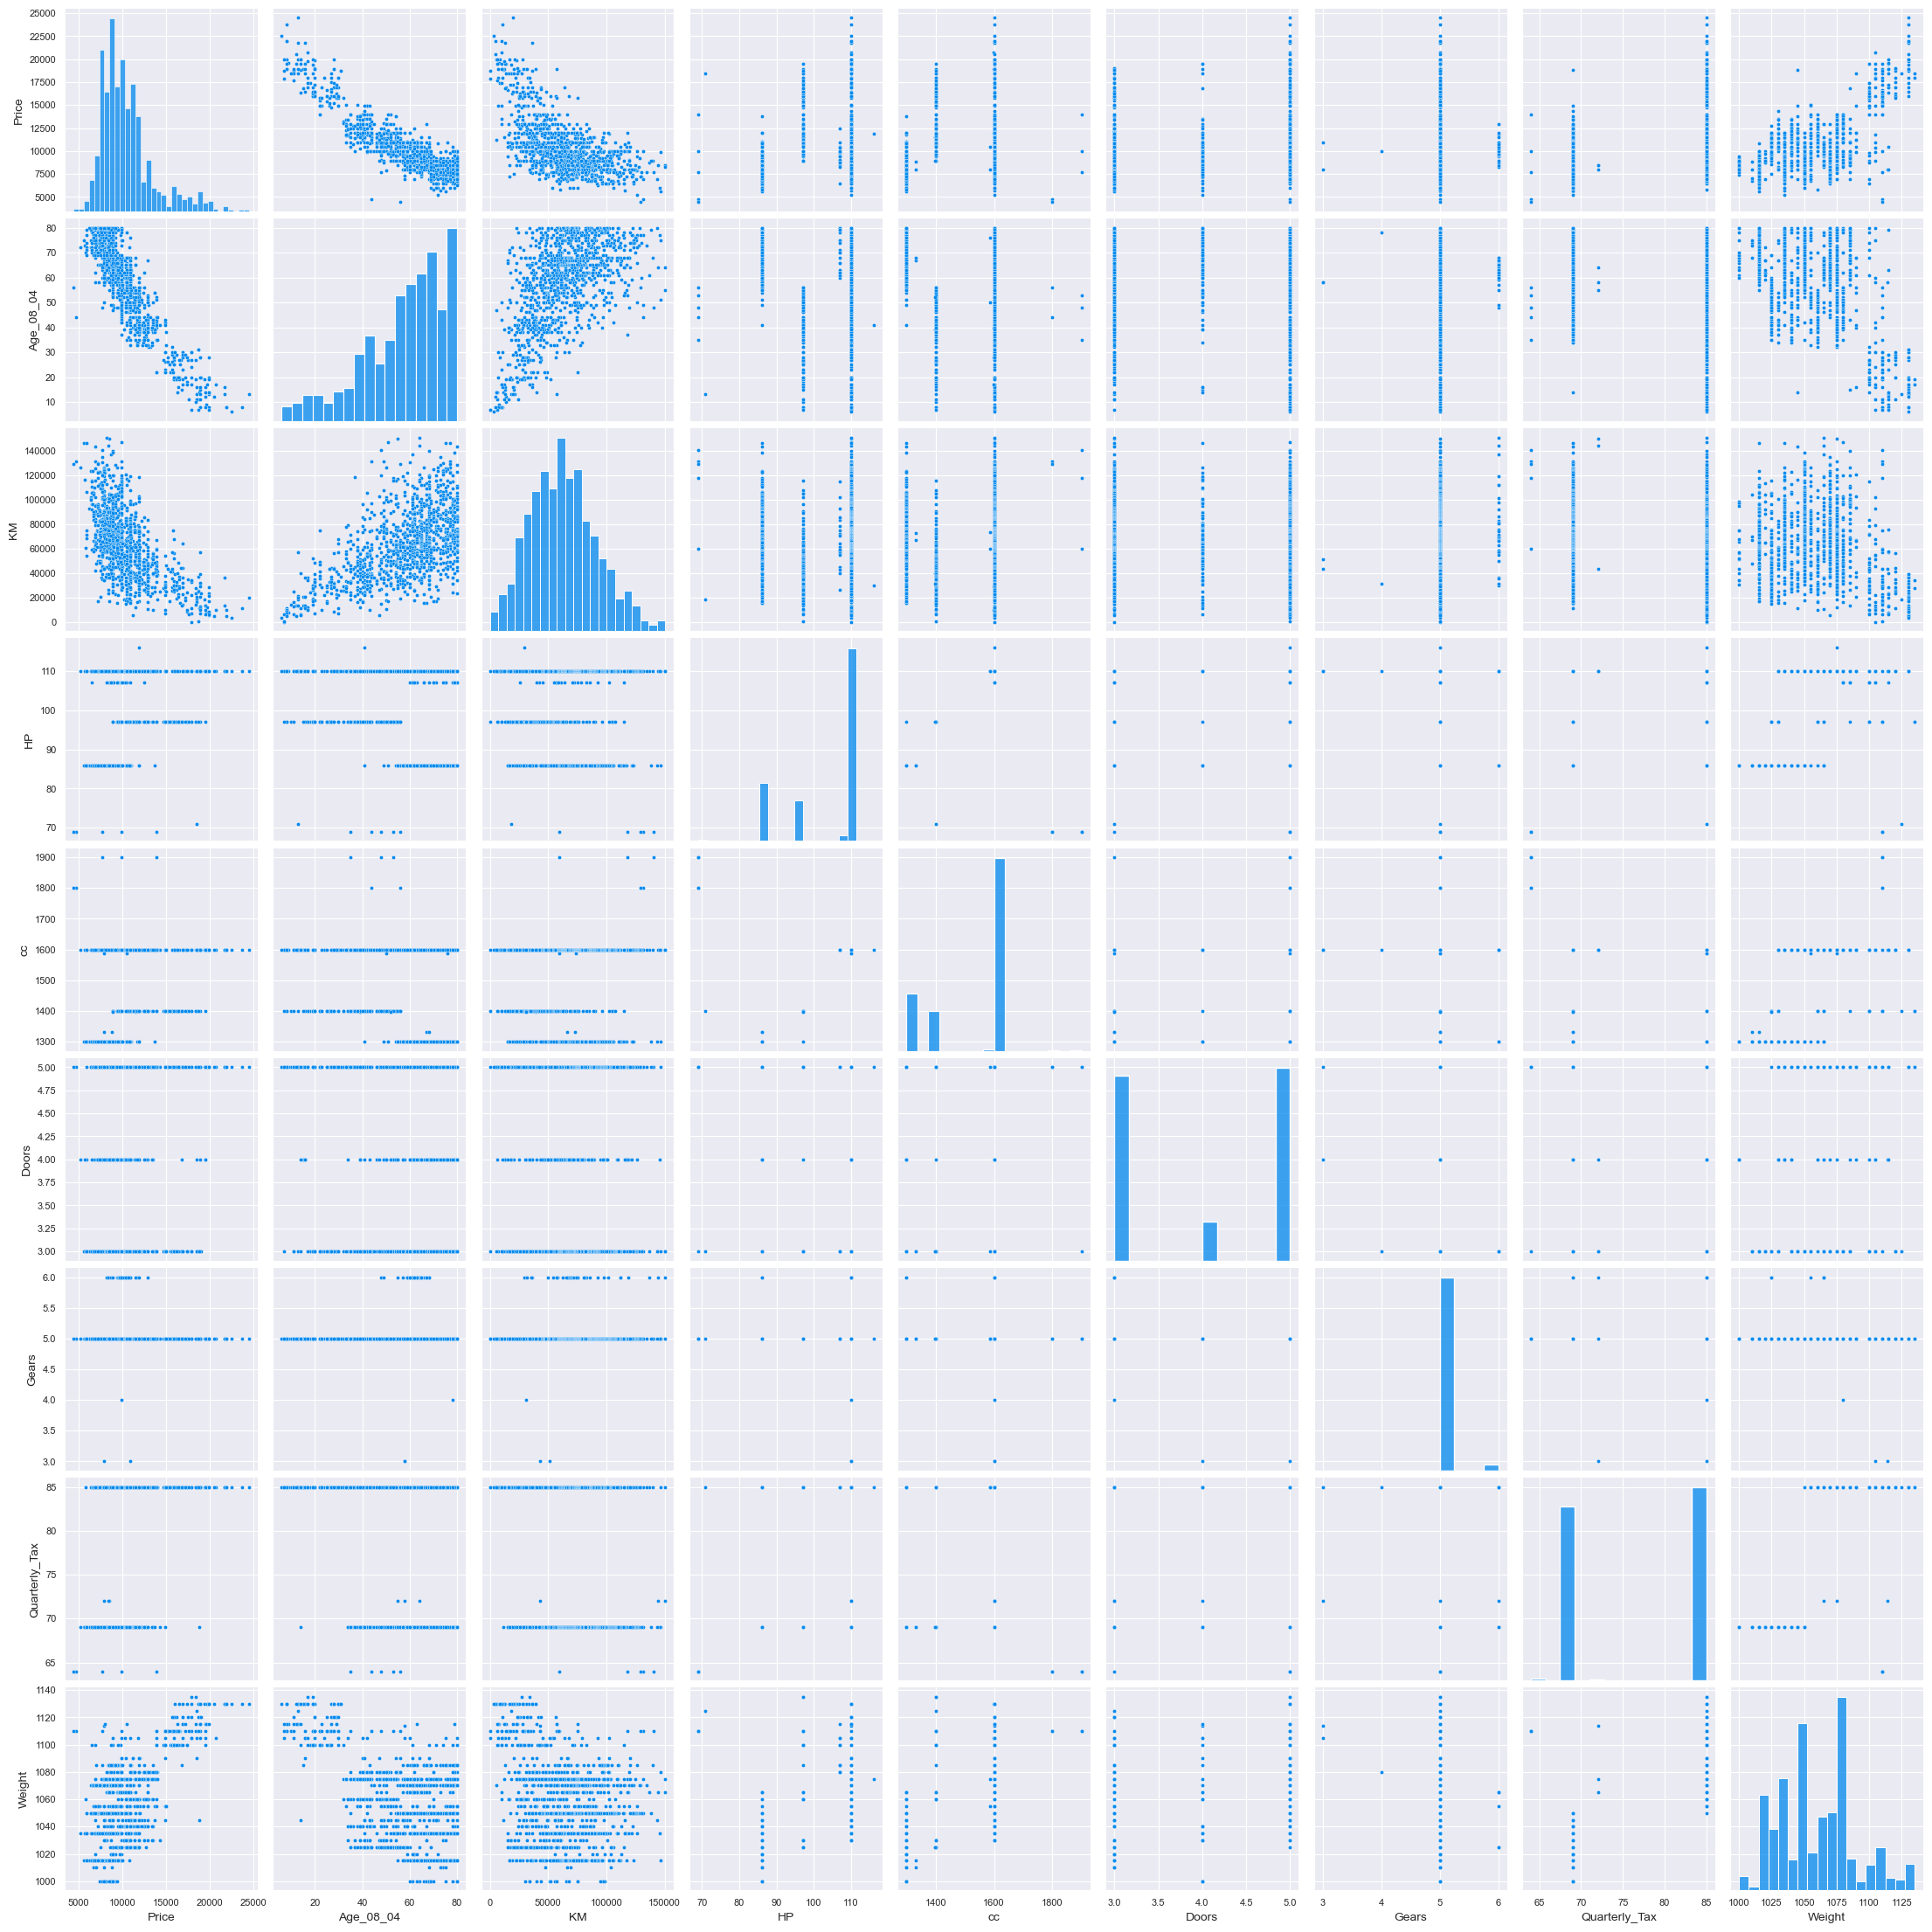

In [111]:
sns.set_style(style='darkgrid')
sns.pairplot(q)

# Correlation Matrix

In [112]:
q.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.893253,-0.608931,0.171014,0.122390,0.204285,-0.006842,0.428193,0.637653
Age_08_04,-0.893253,1.000000,0.571902,-0.086509,-0.056849,-0.147110,0.037925,-0.325610,-0.515452
KM,-0.608931,0.571902,1.000000,-0.006791,0.068045,-0.043436,0.091967,-0.163181,-0.236634
HP,0.171014,-0.086509,-0.006791,1.000000,0.908942,0.168861,0.068246,0.454158,0.483238
cc,0.122390,-0.056849,0.068045,0.908942,1.000000,0.181132,0.067887,0.401288,0.525324
Doors,0.204285,-0.147110,-0.043436,0.168861,0.181132,1.000000,-0.171387,0.570407,0.510374
Gears,-0.006842,0.037925,0.091967,0.068246,0.067887,-0.171387,1.000000,0.117261,-0.013575
Quarterly_Tax,0.428193,-0.325610,-0.163181,0.454158,0.401288,0.570407,0.117261,1.000000,0.781077
Weight,0.637653,-0.515452,-0.236634,0.483238,0.525324,0.510374,-0.013575,0.781077,1.000000


# Preparing a model

In [113]:
#Model building between the al input variables
import statsmodels.formula.api as smf
model4=smf.ols('Price~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=q).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     972.8
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        01:48:02   Log-Likelihood:                -9794.3
No. Observations:                1165   AIC:                         1.961e+04
Df Residuals:                    1156   BIC:                         1.965e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.376e+04   2264.368    -10.493      0.000   -2.82e+04   -1.93e+04
Age_08_04      -109.4013      2.652    -41.252      0.000    -114.605    -104.198
KM               -0.0164      0.001    -11.802      0.000      -0.019      -0.014
HP               57.3450      8.364      6.856      0.000      40.935      73.755
cc               -5.8365      0.686     -8.508      0.000      -7.182      -4.490
Doors           -80.4168     43.921     -1.831      0.067    -166.591       5.758
Gears           738.1335    177.825      4.151      0.000     389.237    1087.030
Quarterly_Tax   -34.9410      7.566     -4.618      0.000     -49.786     -20.096
Weight           41.3586      2.355     17.559      0.000      36.737      45.980
==============================================================================
Omnibus:                       54.449   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.622
Skew:                           0.267   Prob(JB):                     2.36e-27
Kurtosis:                       4.497   Cond. No.                     4.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression models

In [114]:
model5=smf.ols('Price~HP',data=q).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     35.04
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.25e-09
Time:                        01:48:02   Log-Likelihood:                -10968.
No. Observations:                1165   AIC:                         2.194e+04
Df Residuals:                    1163   BIC:                         2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5138.4840    909.173      5.652      0.000    3354.680    6922.288
HP            51.8451      8.759      5.919      0.000      34.660      69.030
==============================================================================
Omnibus:                      309.108   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.330
Skew:                           1.469   Prob(JB):                    2.06e-150
Kurtosis:                       5.360   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model6=smf.ols('Price~cc',data=q).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     17.69
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.81e-05
Time:                        01:48:02   Log-Likelihood:                -10977.
No. Observations:                1165   AIC:                         2.196e+04
Df Residuals:                    1163   BIC:                         2.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6090.2576   1051.145      5.794      0.000    4027.906    8152.609
cc             2.9066      0.691      4.205      0.000       1.551       4.263
==============================================================================
Omnibus:                      307.238   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.929
Skew:                           1.461   Prob(JB):                    3.07e-149
Kurtosis:                       5.357   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [116]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=q).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=q).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=q).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,2.097708
1,KM,1.555855
2,HP,6.803044
3,cc,7.458589
4,Doors,1.718620
5,Gears,1.154807
6,Quarterly_Tax,3.619330
7,Weight,4.613741


# Residual Analysis

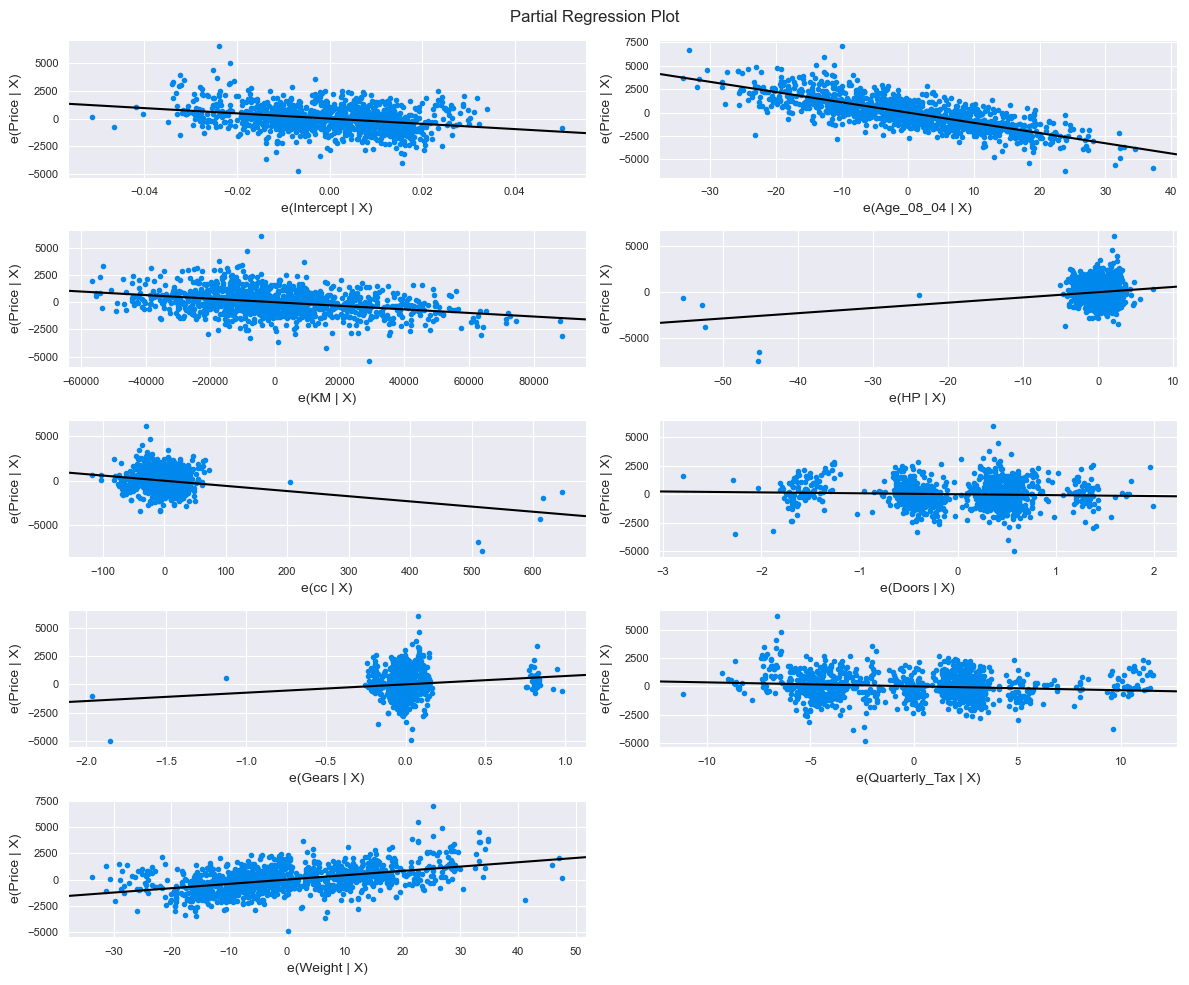

In [117]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model4, fig=fig)
plt.show()

In [118]:
model7=smf.ols('Price~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=q).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1109.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        01:48:06   Log-Likelihood:                -9796.0
No. Observations:                1165   AIC:                         1.961e+04
Df Residuals:                    1157   BIC:                         1.965e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.358e+04   2264.445    -10.411      0.000    -2.8e+04   -1.91e+04
Age_08_04      -109.8900      2.641    -41.605      0.000    -115.072    -104.708
KM               -0.0165      0.001    -11.906      0.000      -0.019      -0.014
HP               58.9313      8.327      7.077      0.000      42.593      75.269
cc               -5.8667      0.687     -8.546      0.000      -7.214      -4.520
Gears           829.0673    170.922      4.851      0.000     493.715    1164.420
Quarterly_Tax   -40.0241      7.046     -5.681      0.000     -53.848     -26.201
Weight           40.7425      2.334     17.459      0.000      36.164      45.321
==============================================================================
Omnibus:                       51.731   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.165
Skew:                           0.257   Prob(JB):                     1.62e-25
Kurtosis:                       4.445   Cond. No.                     4.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Dianostics

# Detecting Inflencers/Outliers 

# Cook's Distance

In [120]:
model_influence = model7.get_influence()
(c, _) = model_influence.cooks_distance

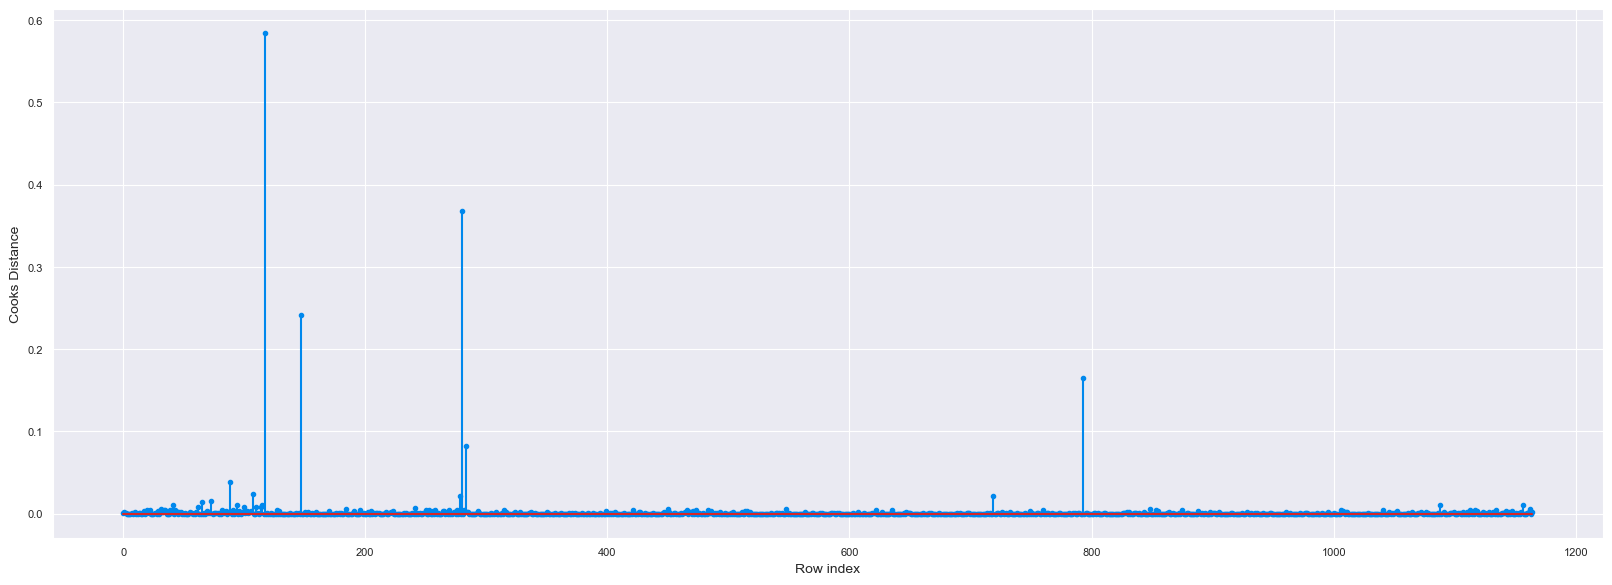

In [121]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(q)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [122]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(117, 0.5839223457007016)

# High Influence plots

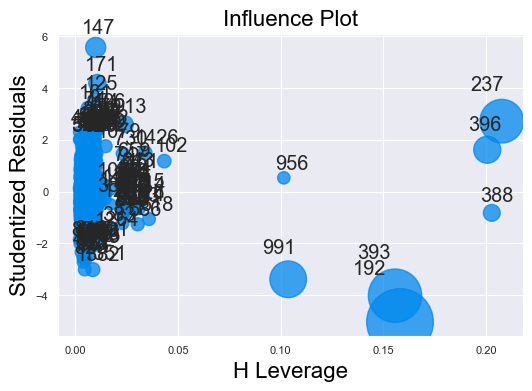

In [123]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model7)
plt.show()

In [124]:
k = q.shape[1]
n = q.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.028326180257510727

# To analyze the 117th observation before removing

In [125]:
q.iloc[50:100,:]

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
85,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,17450,28,8537,110,1600,5,5,85,1130
86,TOYOTA Corolla 1.4 VVTI (Nw type) 4/5-Doors,14900,30,7000,97,1400,5,5,85,1100
88,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,15950,19,51884,97,1400,3,5,85,1100
90,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,16450,20,48110,97,1400,3,5,85,1100
93,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,15950,20,33329,97,1400,3,5,85,1100
94,TOYOTA Corolla 1.6 16v VVT-i Linea Sol 2/3-Doors,18900,20,31850,110,1600,3,5,85,1120
96,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFOR...,15950,19,29435,97,1400,3,5,85,1100
97,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,15950,19,25948,97,1400,3,5,85,1100
98,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,18750,11,24500,110,1600,3,5,85,1120
99,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,17450,18,23902,97,1400,3,5,85,1100


In [126]:
q_imp=q.drop([117],axis=0)
q_imp

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
17,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2...,17950,24,21716,110,1600,3,5,85,1105
19,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,16950,30,64359,110,1600,3,5,85,1105
20,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,15950,30,67660,110,1600,3,5,85,1105
22,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,15950,28,56349,110,1600,3,5,85,1120
23,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,16950,28,32220,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...,...
1430,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8450,80,23000,86,1300,3,5,69,1015
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015


In [127]:
#improved model with no influential observation
model_imp2=smf.ols('Price~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=q_imp).fit()
model_imp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1102.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        01:48:18   Log-Likelihood:                -9787.9
No. Observations:                1164   AIC:                         1.959e+04
Df Residuals:                    1156   BIC:                         1.963e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.357e+04   2265.128    -10.406      0.000    -2.8e+04   -1.91e+04
Age_08_04      -109.9649      2.645    -41.569      0.000    -115.155    -104.775
KM               -0.0166      0.001    -11.913      0.000      -0.019      -0.014
HP               58.9092      8.330      7.072      0.000      42.566      75.252
cc               -5.8621      0.687     -8.536      0.000      -7.210      -4.515
Gears           829.0924    170.972      4.849      0.000     493.641    1164.543
Quarterly_Tax   -40.0315      7.048     -5.680      0.000     -53.859     -26.204
Weight           40.7392      2.334     17.453      0.000      36.159      45.319
==============================================================================
Omnibus:                       51.165   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.825
Skew:                           0.254   Prob(JB):                     3.17e-25
Kurtosis:                       4.438   Cond. No.                     4.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test for Normality of Residuals

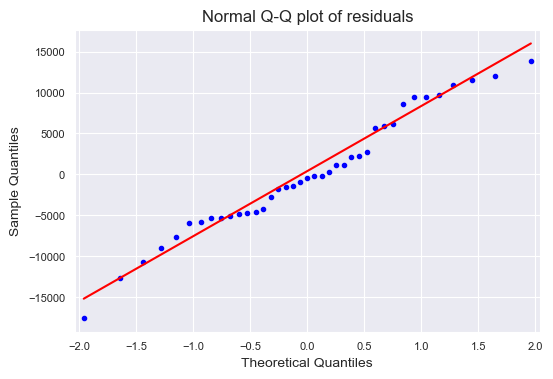

In [128]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_imp1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for Homoscedascity

ValueError: x and y must be the same size

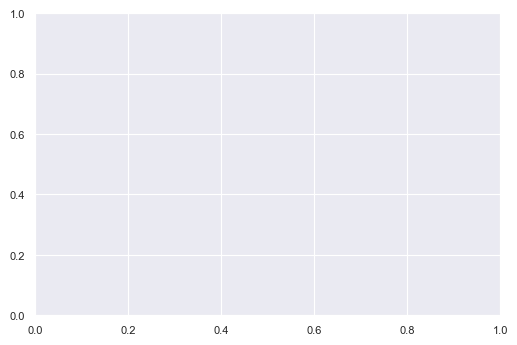

In [129]:
plt.scatter(model_imp.fittedvalues,model_imp1.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model_imp1.fittedvalues),
            get_standardized_values(model_imp1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
plt.hist(model_imp1.resid)

In [ ]:
model_imp1.resid.mean()

In [130]:
#Check the accuracy of the mode
final_ml_V1= smf.ols('Price~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = q_imp).fit()

In [131]:
(final_ml_V1.rsquared,final_ml_V1.aic)

(0.8696536672770324, 19591.853386765204)

# Predicting for New Data

In [132]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':23,"KM":46986,"HP":90,"cc":2000,"Gears":5,"Quarterly_Tax":210,"Weight":1165},index=[1])

In [133]:
final_ml_V1.predict(new_data)

1    9899.696543
dtype: float64

In [134]:
from sklearn.model_selection import train_test_split
train_data1,test_data1 = train_test_split(q_imp,test_size = 0.2)
train_data1

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
953,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,9250,66,52383,86,1300,3,5,69,1015
161,TOYOTA Corolla 1.6 16v VVTi Linea Sol 4/5-Doors,20750,17,10000,110,1598,5,5,85,1105
1312,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stati...,9950,79,68945,110,1600,5,5,85,1085
1123,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stati...,9250,76,110901,110,1600,5,5,85,1085
835,TOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-Doors,9750,67,67762,110,1600,3,6,85,1065
...,...,...,...,...,...,...,...,...,...,...
532,TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors,10850,54,47768,110,1600,3,5,85,1055
1294,TOYOTA Corolla 1.6 Terra LB 4/5-Doors,6950,80,71740,110,1600,5,5,85,1070
1390,TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA AUT4 ...,8500,73,52000,110,1600,4,5,85,1065
694,TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-D...,8950,66,97046,86,1300,4,5,69,1000


In [135]:
#final model building using train_data
model_final1 = smf.ols('Price~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = train_data1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     841.2
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        01:48:23   Log-Likelihood:                -7835.8
No. Observations:                 931   AIC:                         1.569e+04
Df Residuals:                     923   BIC:                         1.573e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.482e+04   2511.003     -9.883      0.000   -2.97e+04   -1.99e+04
Age_08_04      -109.0482      2.967    -36.748      0.000    -114.872    -103.224
KM               -0.0171      0.002    -10.711      0.000      -0.020      -0.014
HP               50.1067      9.347      5.360      0.000      31.762      68.451
cc               -5.3193      0.765     -6.952      0.000      -6.821      -3.818
Gears           844.3600    187.504      4.503      0.000     476.375    1212.345
Quarterly_Tax   -38.7348      7.835     -4.944      0.000     -54.111     -23.359
Weight           41.8367      2.587     16.175      0.000      36.760      46.913
==============================================================================
Omnibus:                       45.566   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.419
Skew:                           0.194   Prob(JB):                     1.58e-27
Kurtosis:                       4.741   Cond. No.                     4.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
w = model_final1.predict(test_data1)
w

933      9851.874720
393      8936.633098
816     10133.549089
641      8424.265508
1009    10598.411191
            ...     
122     17553.022513
663      8364.624182
239     12929.964853
918     10021.557750
1290     7300.441713
Length: 233, dtype: float64

In [137]:
#To calculate RMSE Values
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [138]:
#predict y values for train data 
train_yhat1 = model_final1.predict(train_data1)
train_y1 = train_data1.Price
RMSE_train1 = RMSE(train_yhat1, train_y1)
print("RMSE value of train data is",round(RMSE_train1,4))

RMSE value of train data is 1093.9749


In [139]:
#predict y values for test data
test_yhat1 = model_final1.predict(test_data1)
test_y1 = test_data1.Price
RMSE_test1 = RMSE(test_yhat,test_y)
print("RMSE value of test data is",round(RMSE_test1,4))

RMSE value of test data is 8052.784


In [140]:
#Conclusion - As the RMSE value for this final models are similar we can consider this best model.